<a href="https://colab.research.google.com/github/Nikitaa19/Predicting-Customer-response-to-Personal-Loan-Ad-Campaign/blob/master/Predicting_Customer_response_to_Personal_Loan_Ad_Campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load the dataset
data = pd.read_csv("/content/Bank_Personal_Loan_Modelling.csv")

In [ ]:
data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [ ]:
data.columns.values

array(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'], dtype=object)

In [ ]:
# Process the data
data.dropna(inplace=True)
data = pd.get_dummies(data, columns=['Education'], drop_first=True)

In [ ]:
# Split the dataset into features (X) and target (y)
X = data.drop('Personal Loan', axis=1)
y = data['Personal Loan']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize StandardScaler
scaler = StandardScaler()

In [ ]:
# Scale the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize models
logreg_model = LogisticRegression(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)

In [ ]:
# Train the models
logreg_model.fit(X_train_scaled, y_train)
dt_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Predict on test data
y_pred_logreg = logreg_model.predict(X_test_scaled)
y_pred_dt = dt_model.predict(X_test_scaled)

In [ ]:
# Confusion Matrix
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
cm_dt = confusion_matrix(y_test, y_pred_dt)

In [ ]:
print("Confusion Matrix - Logistic Regression:")
print(cm_logreg)
print("\nConfusion Matrix - Decision Tree:")
print(cm_dt)

Confusion Matrix - Logistic Regression:
[[887   8]
 [ 27  78]]

Confusion Matrix - Decision Tree:
[[888   7]
 [  9  96]]


In [ ]:
# Classification Report
report_logreg = classification_report(y_test, y_pred_logreg)
report_dt = classification_report(y_test, y_pred_dt)

In [ ]:
print("Classification Report - Logistic Regression:")
print(report_logreg)
print("\nClassification Report - Decision Tree:")
print(report_dt)

Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       895
           1       0.91      0.74      0.82       105

    accuracy                           0.96      1000
   macro avg       0.94      0.87      0.90      1000
weighted avg       0.96      0.96      0.96      1000


Classification Report - Decision Tree:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       895
           1       0.93      0.91      0.92       105

    accuracy                           0.98      1000
   macro avg       0.96      0.95      0.96      1000
weighted avg       0.98      0.98      0.98      1000



In [ ]:
# ROC Curve and ROC-AUC
y_prob_logreg = logreg_model.predict_proba(X_test_scaled)[:, 1]
y_prob_dt = dt_model.predict_proba(X_test_scaled)[:, 1]

In [ ]:
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_prob_logreg)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)

In [ ]:
roc_auc_logreg = roc_auc_score(y_test, y_prob_logreg)
roc_auc_dt = roc_auc_score(y_test, y_prob_dt)

In [ ]:
print("ROC-AUC - Logistic Regression:", roc_auc_logreg)
print("\nROC-AUC - Decision Tree:", roc_auc_dt)

ROC-AUC - Logistic Regression: 0.9755573290768822

ROC-AUC - Decision Tree: 0.9532322426177173


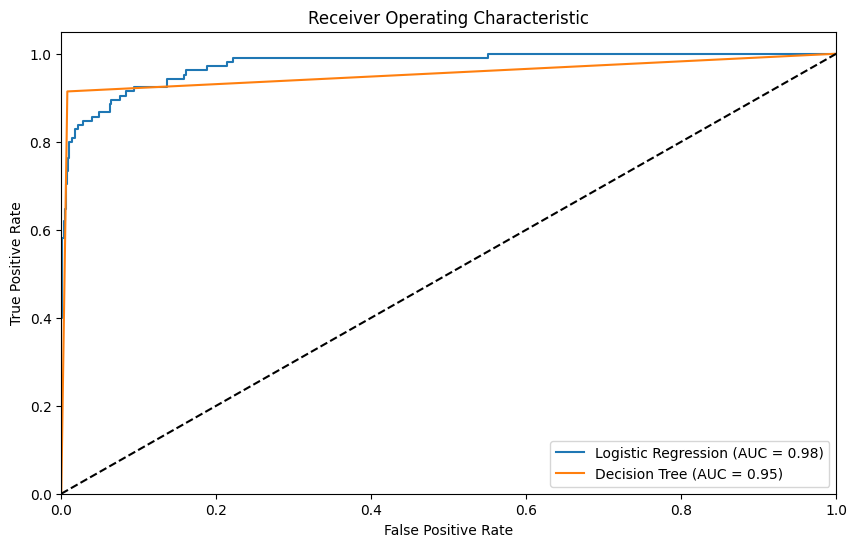

In [ ]:
# Plot ROC Curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()